# Ejercicio Viga en Cantilever
Determinar:
1. Grafico relacion fuerza desplazamiento

In [1]:
# Importamos las dependencias
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from scipy.interpolate import interp1d

## Datos

In [2]:
# Unidades [MKS]
m=100 #[cm]
cm=1 #[cm]
mm=1/10 #[cm]

kgf=1 #[kgf]
tf=1000 #[kgf]

ksi=70.3*kgf/cm**2

# Datos del problema
L=245*cm
B=5*cm
H=20*cm

fy=36*ksi
Es=29000*ksi

## Calculos

In [3]:
ey=fy/Es
phi_y=2*ey/(H)
Iy=B*H**3/12
My=phi_y*Es*Iy

print('Deformacion unitaria de fluencia = '+str(round(ey,4)))
print('Curvatura de fluencia = '+str(round(phi_y,6)))
print('Inercia de la seccion de 0 < phi < phi_y = '+str(round(Iy/cm**4,2))+' cm⁴')
print('Momento de fluencia = '+str(round(My/(tf*m),2))+' tf.m')

Deformacion unitaria de fluencia = 0.0012
Curvatura de fluencia = 0.000124
Inercia de la seccion de 0 < phi < phi_y = 3333.33 cm⁴
Momento de fluencia = 8.44 tf.m


In [4]:
A=B*H
Mp=fy*A*H/4
print('Momento plastico = '+str(round(Mp/(tf*m),2))+' tf.m')

Momento plastico = 12.65 tf.m


Text(0.5, 1.0, 'Diagrama Momento/Curvatura')

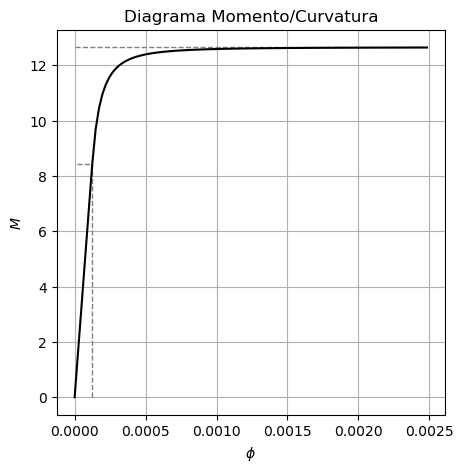

In [5]:
# Calculamos la relacion de momento curvartura para el regimen elasto plastico
# Determinamos un array con valores de curvatura de phi_y
Delta=100
phiArray=np.linspace(phi_y,20*phi_y,Delta)
MArray=(fy*B)*(H**2/4-ey**2/(3*phiArray**2))

phiArray=np.append(np.array([0,phi_y]),phiArray)
MArray=np.append(np.array([0,My]),MArray)

#phiArray=np.append(phiArray,np.array([10**9]))
#MArray=np.append(MArray,np.array([Mp]))

plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,phiArray[-1]],[Mp/(tf*m),Mp/(tf*m)],color='grey',linestyle='--',linewidth=1)
plt.plot([phi_y,phi_y,0],[0,My/(tf*m),My/(tf*m)],color='grey',linestyle='--',linewidth=1)
plt.plot(phiArray,MArray/(tf*m),color='k',linestyle='-',linewidth=1.5)
plt.grid(True)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$M$')
plt.title('Diagrama Momento/Curvatura')


In [6]:
# Determinamos la carga P que lleva a la fluencia al sistema
Py=My/L
print('La carga de fluencia es = '+str(round(Py/(tf),2))+' tf')
# Como referencia calculamos la deformacion de fluencia del sistema
EQ=r'$\delta_y = \frac{PL^3}{3EI} = $'
dy=Py*L**3/(3*Es*Iy)
ftext=f'La deformacion de fluencia, {EQ} {round(dy/mm,2)} [mm]'
display(Latex(ftext))
# Determinamos la carga P que plastifica el sistema
Pp=Mp/L
print('La carga de plastificacion es = '+str(round(Pp/(tf),2))+' tf')
# Determinamos la relacion entre Py y Pp
EQ=r'$\frac{P_p}{P_y} = $'
ftext=f'La relacion {EQ} {round(Pp/Py,2)}'
display(Latex(ftext))

La carga de fluencia es = 3.44 tf


<IPython.core.display.Latex object>

La carga de plastificacion es = 5.16 tf


<IPython.core.display.Latex object>

La longitud de la rotula plastica es = 76.28 cm


<IPython.core.display.Latex object>

168.71999999999997
155.43621014218246
-42.82277758913375


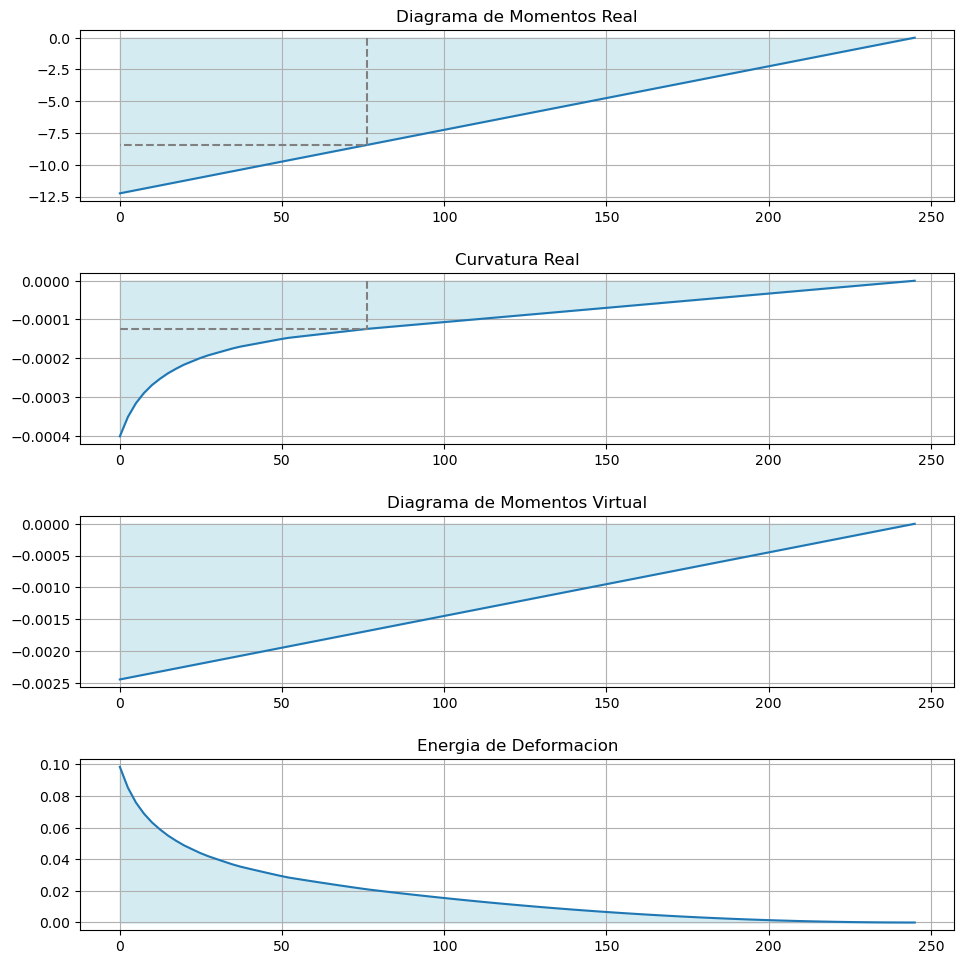

In [7]:
# Para un valor de carga pre-establecido calculamos el diagrama de momentos, curvatura y integramos la deflexion
Pcal=5000
DeltaL=100

xArray=np.linspace(0,L,DeltaL)
Mx=Pcal*xArray-Pcal*L
mv=xArray-L

# Interpolamos los valores de momento para obtener las curvaturas de la seccion
interpolation_function_Mphi=interp1d(MArray,phiArray,fill_value='extrapolate')
phix=-interpolation_function_Mphi(np.abs(Mx))

# Calculamos la longitud de la rotula plastica
Lp=L-My/Pcal
print('La longitud de la rotula plastica es = '+str(round(Lp,2))+' cm')

# Calculamos la energia de deformacion
U=phix*mv

# Calculamos el desplazamiento
delta=np.trapz(U,xArray)

# Calculamos la deflexion por el metodo de areas de momentos
deltaAM=np.trapz(phix*(L-xArray),xArray)

EQ=r'$\delta = $'
ftext=f'La deformacion calculada {EQ} {round(delta/mm,2)} [mm]'

display(Latex(ftext))

fig, ax = plt.subplots(4, figsize=(10,10), dpi=100)

ax[0].plot(xArray,Mx/(tf*m))
ax[0].fill_between(xArray,Mx/(tf*m),color='lightblue', alpha=0.5)
ax[0].plot([Lp,Lp,0],[0,-My/(tf*m),-My/(tf*m)],color='grey',linestyle='--')
ax[0].grid(True)
ax[0].set_title('Diagrama de Momentos Real')

ax[1].plot(xArray,phix)
ax[1].fill_between(xArray,phix,color='lightblue', alpha=0.5)
ax[1].plot([Lp,Lp,0],[0,-phi_y,-phi_y],color='grey',linestyle='--')
ax[1].grid(True)
ax[1].set_title('Curvatura Real')

ax[2].plot(xArray,mv/(tf*m))
ax[2].fill_between(xArray,mv/(tf*m),color='lightblue', alpha=0.5)
ax[2].grid(True)
ax[2].set_title('Diagrama de Momentos Virtual')

ax[3].plot(xArray,U)
ax[3].fill_between(xArray,U,color='lightblue', alpha=0.5)
ax[3].grid(True)
ax[3].set_title('Energia de Deformacion')

plt.tight_layout(pad=2.0)

# Comparamos con la deformacion teorica

a=(L-Lp)/L
dTeorica = lambda a: ((2*L**2*fy)/(3*Es*H))*(((18*a**2-6*a-1)/(3*(1-(2/3)*(1/a)))**0.5)-(10*(a**2)))
d_teo=dTeorica(a)
print(a*L)
print(d_teo/mm)
print(deltaAM/mm)


Text(0.5, 1.0, 'Diagrama Fuerza/Deformacion')

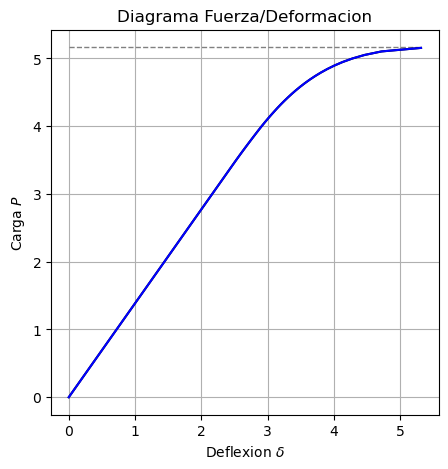

In [8]:
# Definimos un array de cargas para determinar las deflexiones de la viga hasta alcanzar la carga plastica
DeltaP=100
PArray=np.linspace(0,Pp-10,DeltaP)

# Generamos un vector de zeros para almacenar las deformaciones
dArray=np.zeros([1,len(PArray)])
dArray2=np.zeros([1,len(PArray)])

for ii, Pvalue in enumerate(PArray):
    Mx_temp=Pvalue*xArray-Pvalue*L
    phix_temp=-interpolation_function_Mphi(np.abs(Mx_temp))
    U_temp=phix_temp*mv
    dArray[0,ii]=np.trapz(-phix_temp*(L-xArray),xArray)
    dArray2[0,ii]=np.trapz(U_temp,xArray)

dArray=dArray[0]
dArray2=dArray2[0]
#print(PArray)
#print(dArray2)
    
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,dArray[-1]],[Pp/(tf),Pp/(tf)],color='grey',linestyle='--',linewidth=1)
#plt.plot([phi_y,phi_y,0],[0,My/(tf*m),My/(tf*m)],color='grey',linestyle='--',linewidth=1)
plt.plot(dArray,PArray/(tf),color='k',linestyle='-',linewidth=1.5)
plt.plot(dArray2,PArray/(tf),color='b',linestyle='-',linewidth=1.5)
plt.grid(True)
plt.xlabel('Deflexion '+r'$\delta$')
plt.ylabel('Carga '+r'$P$')
plt.title('Diagrama Fuerza/Deformacion')


Text(0.5, 1.0, 'Diagrama Fuerza/Deformacion')

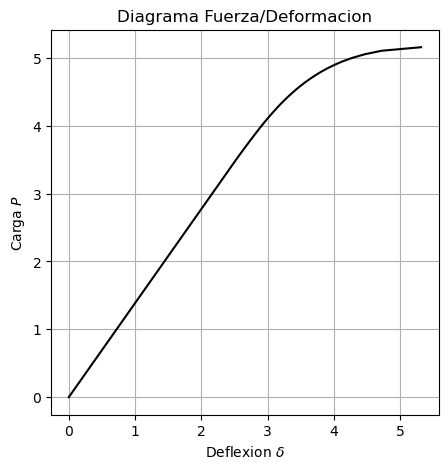

In [9]:
# Calculamos la respuesta teorica del sistema
DeltaL=10
Le=np.linspace(L,0.7*L,DeltaL)
PTeorico=My/Le

a=Le/L
#dTeorica=(2*L**2*fy/(3*Es*H))*((18*a**2-6*a-1)/(3*(1-(2/3)*(1/a)))**0.5-10*(a)**2)
dt=np.zeros([1,len(Le)])
for i,j in enumerate(a):
    dt[0,i]=dTeorica(j)
    
plt.figure(figsize=(5,5), dpi=100)
#plt.plot([0,dArray[-1]],[Pp/(tf),Pp/(tf)],color='grey',linestyle='--',linewidth=1)
#plt.plot([phi_y,phi_y,0],[0,My/(tf*m),My/(tf*m)],color='grey',linestyle='--',linewidth=1)
#plt.plot(dt,PTeorico/(tf),color='b',linestyle='-',linewidth=1.5)
plt.plot(dArray,PArray/(tf),color='k',linestyle='-',linewidth=1.5)
plt.grid(True)
plt.xlabel('Deflexion '+r'$\delta$')
plt.ylabel('Carga '+r'$P$')
plt.title('Diagrama Fuerza/Deformacion')

(0.0, 6.0)

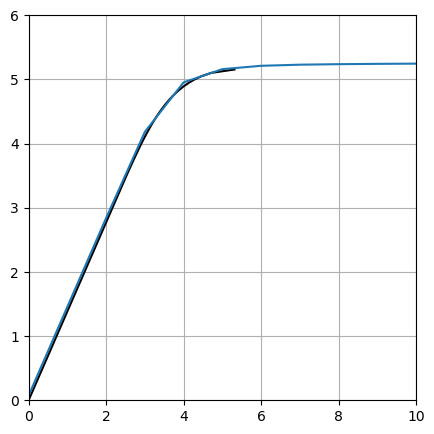

In [10]:
# Cargamos la data obtenida de SeismoStruct
#filename='C:\Users\nmora\OneDrive\ape\Programas\python\New folder\Ejercicios\Vigan Cantilever/SeismoData.txt'
data=np.loadtxt('SeismoData.txt')

# Graficamos la Data
plt.figure(figsize=(5,5), dpi=100)
plt.plot(dArray,PArray/(tf),color='k',linestyle='-',linewidth=1.5)
plt.plot(data[:,1],-data[:,0])
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,6)